# Artificial and Computational Intelligence Assignment 5 - Group 60

* Gupta Kunal Anilbhai - 2019HC04744
* Sachin Baburao Shelke - 
* Vinayak Vaid - 
* Khushi Raj - 
* Ramita Sengupta - 

## Bidirectional Seach Agent Environment (PEAS)

#### Performance measure: Comfortable trip, safety, minimizing distance

#### Envrironment: Ship, map, citizens, ship crew, weather

#### Actuator: Steering wheel, distances of the cities, map of the routes, weather report

#### Sensor: Eyes, map of the routes

## Strategy used in Bidirectional search

1. Bidirectional search is a graph search algorithm that finds a shortest path from an initial vertex
to a goal vertex in a directed graph. It runs two simultaneous searches: one forward from the
initial state, and one backward from the goal, stopping when the two meet. The reason for this
approach is that in many cases it is faster: for instance, in a simplified model of search problem
complexity in which both searches expand a tree with branching factor b, and the distance from
start to goal is d, each of the two searches has complexity O(bd/2) (in Big O notation), and the
sum of these two search times is much less than the O(bd) complexity that would result from a
single search from the beginning to the goal.

2. We can consider bidirectional approach when- Both initial and goal states are unique and
completely defined. And the branching factor is exactly the same in both directions.
3. Bidirectional search is complete if BFS is used in both searches. Also, it is optimal if BFS is used
for search and paths have uniform cost. Time and space complexity is O(bd/2).
4. For below figure, Suppose we want to find if there exists a path from vertex 0 to vertex 14. Here
we can execute two searches, one from vertex 0 and other from vertex 14. When both forward
and backward search meet at vertex 7, we know that we have found a path from node 0 to 14
and search can be terminated now. We can clearly see that we have successfully avoided
unnecessary exploration.

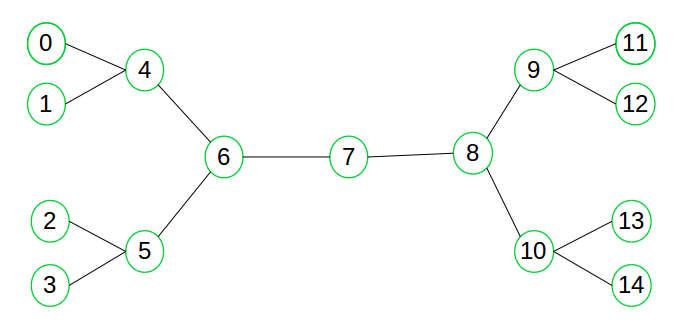

## Importing Libraries

In [2]:
from queue import Queue

## Using Adjacency list class for defining the graph and a dictionary to hold edge weights

In [3]:
class AdjacencyList:

    def __init__(self):
        self.adjacency_list = {}
        self.edge_weights = {}

    def add_edge(self, u, v, dist):
        # Creating adjacency list
        if u not in self.adjacency_list.keys():
            self.adjacency_list[u] = list()
        if v not in self.adjacency_list.keys():
            self.adjacency_list[v] = list()

        self.adjacency_list[u].append(v)
        self.adjacency_list[v].append(u)

        self.adjacency_list[u].sort()
        self.adjacency_list[v].sort()

        # Creating edge weights dictionary
        if (u + "" + v) not in self.edge_weights.keys() or (v + "" + u) not in self.edge_weights.keys():
            self.edge_weights[u + "" + v] = dist


## Finding the path and cost using Bidirectional Search Agent

### Defining a BFS class which the bidirectional serach agent uses as a search strategy

In [4]:
class BFS:

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def search(self, direction, elem, visited, queue, parent, level):
        for node in self.adjacency_list[elem]:
            if not visited[node]:
                queue.put(node)
                visited[node] = True
                parent[node] = elem
                level[node] = level[elem] + 1

    def check_intersecting_node(self, visited_src, visited_dest):
        bfs_traversal_intersection = []
        for key, value in self.adjacency_list.items():
            if visited_src[key] and visited_dest[key]:
                bfs_traversal_intersection.append(key)
        return bfs_traversal_intersection


## Defining Bidirectional Search class which finds the optimal path and calculates the cost

In [5]:
class BidirectionalSearch:

    def __init__(self, adjacency_list):
        self.visited_src = {}
        self.visited_dest = {}

        self.level_src = {}
        self.level_dest = {}

        self.parent_src = {}
        self.parent_dest = {}

        self.bfs_traversal_output_forward = []
        self.bfs_traversal_output_backward = []

        self.bfs_traversal_intersection_path_cost = []
        self.path_list = {}

        self.forward_queue = Queue()
        self.backward_queue = Queue()

        self.bfs = BFS(adjacency_list)

        self.intersecting = None

        # initializing dictionaries
        for node in adjacency_list.keys():
            self.visited_src[node] = False
            self.visited_dest[node] = False
            self.parent_src[node] = None
            self.parent_dest[node] = None
            self.level_src[node] = -1  # inf
            self.level_dest[node] = -1  # inf

    def search_strategy(self, start_vertex, dest_vertex):
        self.visited_src[start_vertex] = True
        self.level_src[start_vertex] = 0
        self.forward_queue.put(start_vertex)

        self.visited_dest[dest_vertex] = True
        self.level_dest[dest_vertex] = 0
        self.backward_queue.put(dest_vertex)

        while not self.forward_queue.empty() and not self.backward_queue.empty():
            elem = self.forward_queue.get()
            self.bfs_traversal_output_forward.append(elem)
            self.bfs.search("forward", elem, self.visited_src, self.forward_queue, self.parent_src, self.level_src)

            last_elem = self.backward_queue.get()
            self.bfs_traversal_output_backward.append(last_elem)
            self.bfs.search("backward", last_elem, self.visited_dest, self.backward_queue, self.parent_dest,
                            self.level_dest)

            print(f"Current level - {self.level_src}")
            print(f"Visited vertices from source dictionary - {self.visited_src}")
            print(f"Visited vertices from dest dictionary - {self.visited_dest}")

            self.bfs_traversal_intersection_path_cost = self.bfs.check_intersecting_node(self.visited_src,
                                                                                         self.visited_dest)
            if self.bfs_traversal_intersection_path_cost:
                self.bfs_traversal_output_backward.reverse()
                break

        print(f"Intersecting nodelist is {self.bfs_traversal_intersection_path_cost}")

    def get_path_and_cost(self, edge_weights, start, dest):
        ctr = -1
        min_cost = 0
        for i in self.bfs_traversal_intersection_path_cost:
            self.intersecting = i
            if self.intersecting in self.bfs_traversal_output_forward or self.intersecting in self.bfs_traversal_output_backward:
                path = self.bfs_traversal_output_forward + self.bfs_traversal_output_backward
            else:
                path = self.bfs_traversal_output_forward + [self.intersecting] + self.bfs_traversal_output_backward
            self.path_list[++ctr] = path

            cost = 0
            for i in range(len(path) - 1):
                for key, value in edge_weights.items():
                    if (key == path[i] + "" + path[i + 1]) or (key == path[i + 1] + "" + path[i]):
                        cost = cost + value
            if min_cost == 0:
                min_cost = cost
                min_path = self.path_list[ctr]
            if min_cost != 0 and min_cost > cost:
                min_cost = cost
                min_path = self.path_list[ctr]

        print(f"Optimal Path from {start} to {dest} is {min_path}")
        print(f"Cost to go from {start} to {dest} is {min_cost}")

## Defining the main function which will take inuput from the user for search and destination city and find the optimal path for the ship to travel

In [6]:
def main():
    """
    Entry point of our execution. This given will create the given graph, take inputs from the user for source and
    destination nodes and prints the path, cost and visited vertices traversed while looking for the path
    :return: None
    """

    """ Creating the graph given in the problem """
    adjacency_list = AdjacencyList()
    adjacency_list.add_edge("A", "B", 110)
    adjacency_list.add_edge("B", "D", 159)
    adjacency_list.add_edge("D", "F", 98)
    adjacency_list.add_edge("F", "E", 68)
    adjacency_list.add_edge("E", "C", 89)
    adjacency_list.add_edge("A", "C", 132)
    adjacency_list.add_edge("B", "G", 59)
    adjacency_list.add_edge("D", "G", 108)
    adjacency_list.add_edge("F", "G", 92)
    adjacency_list.add_edge("E", "G", 102)
    adjacency_list.add_edge("C", "G", 120)

    """ Taking input from the user """
    valid_nodes = ["A", "B", "C", "D", "E", "F", "G"]
    source_node = input(f"Please enter your source location/city?: ")
    if source_node not in valid_nodes:
        print(f"'{source_node}' is not available as source city. You can only choose from - {str(valid_nodes)}")
        return

    valid_nodes.remove(source_node)

    destination_node = input(f"Please enter your dream destination location/city?: ")
    if destination_node not in valid_nodes:
        print(
            f"'{destination_node}' is not available as destination city. You can only choose from - {str(valid_nodes)}")
        return

    """ Listing visited vertices, path and cost using Bidirectional search """
    bidirectional_search = BidirectionalSearch(adjacency_list.adjacency_list)
    bidirectional_search.search_strategy(source_node, destination_node)
    bidirectional_search.get_path_and_cost(adjacency_list.edge_weights, source_node, destination_node)
#     bidirectional_search_new = BidirectionalSearch_new(adjacency_list.adjacency_list)

## Calling the main function to run the program. Please make sure all the cells above are run before executing this cell

In [8]:
main()

Please enter your source location/city?:  C
Please enter your dream destination location/city?:  B


Current level - {'A': 1, 'B': -1, 'D': -1, 'F': -1, 'E': 1, 'C': 0, 'G': 1}
Visited vertices from source dictionary - {'A': True, 'B': False, 'D': False, 'F': False, 'E': True, 'C': True, 'G': True}
Visited vertices from dest dictionary - {'A': True, 'B': True, 'D': True, 'F': False, 'E': False, 'C': False, 'G': True}
Intersecting nodelist is ['A', 'G']
Optimal Path from C to B is ['C', 'G', 'B']
Cost to go from C to B is 179
